## Klasyfikacja osób chorych na cukrzyce, w stanie przedcukrzycowym i zdrowych na podstawie danych behawioralnych 

https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv


W projekcie korzystam datasetu w tym pliku: <em>"diabetes_012_health_indicators_BRFSS2015.csv"</em>. Dla własnej wygody zmieniłem jego nazwę na <em>"data"</em>.

In [1]:
import pandas as pd
import numpy as np
import os, os.path as op

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(op.join('data', 'data.csv'), sep =',')

In [3]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.shape

(253680, 22)

Zbió danych składa się z 22 kolumn - 21 jeden kolumn cechami i jedna z trzema klasami. Ponad to zbiór składa się z 253 680 rekordów. 

In [5]:
data.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
np.sum(data.isna())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Wszytkie kolumny są numeryczne ale nie wszystkie dane są ilościowe, niektóre z nich są nominalne.

In [7]:
np.sum(data.isnull())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Nie ma brakujących danych.

#### Labels

In [8]:
data.Diabetes_012.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

In [9]:
data.Diabetes_012.unique()

array([0., 2., 1.])

- Klasa 0 to osoby zdrowe
- Klasa 1 to osoby w stanie przed cukrzycowym
- Klasa 2 to osoby chore na cukrzyce

Zbiór nie posiada braków danych wewnątrz.

In [10]:
def plot_histogram(data, column, title,bins):
    """Plotting histogram of a column

    Args:
        data (dataframe): dataframe
        column (column): column you want to plot
        title (string): column name
    """
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.hist(data[column], bins=bins)
    plt.show()

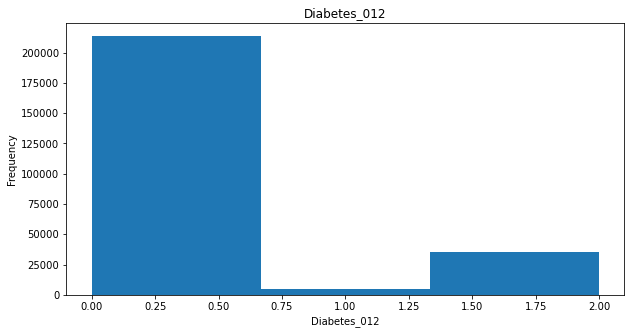

Ilośc pomiarów w każej klasie klasy 0: 213703, 1: 4631, 2: 35346
Udział procentowy klasy 0: 84.0%, 1: 1.0%, 2: 13.0%


In [11]:
plot_histogram(data, 'Diabetes_012', 'Diabetes_012', bins=3)
data_perc = data.Diabetes_012.value_counts()*100/len(data)
data_count  = data.Diabetes_012.value_counts()
print(f"Ilośc pomiarów w każej klasie klasy 0: {data_count[0]}, 1: {data_count[1]}, 2: {data_count[2]}")
print(f"Udział procentowy klasy 0: {np.floor(data_perc[0])}%, 1: {np.floor(data_perc[1])}%, 2: {np.floor(data_perc[2])}%")

### Income

In [12]:
print(f"Kolumna income jest podzielona na: {len(data.Income.unique())} i ma następujące grupy:{data.Income.unique()}")

Kolumna income jest podzielona na: 8 i ma następujące grupy:[3. 1. 8. 6. 4. 7. 2. 5.]


Grupa 1. ma najmniejsze zarobki a grupa 8. ma największe.

In [13]:
data_perc = data.Income.value_counts()*100/len(data)
data_count  = data.Income.value_counts()
print(f"Ilośc pomiarów w każej klasie klasy 1: {data_count[1]}, 2: {data_count[2]}, 3: {data_count[3]}, 4: {data_count[4]}, 5: {data_count[5]}, 6: {data_count[6]}, 7: {data_count[7]}, 8: {data_count[8]}")
print(f"Udział procentowy klasy 1: {np.floor(data_perc[1])}%, 2: {np.floor(data_perc[2])}%, 3: {np.floor(data_perc[3])}%, 4: {np.floor(data_perc[4])}%, 5: {np.floor(data_perc[5])}%, 6: {np.floor(data_perc[6])}%, 7: {np.floor(data_perc[7])}%, 8: {np.floor(data_perc[8])}%")

Ilośc pomiarów w każej klasie klasy 1: 9811, 2: 11783, 3: 15994, 4: 20135, 5: 25883, 6: 36470, 7: 43219, 8: 90385
Udział procentowy klasy 1: 3.0%, 2: 4.0%, 3: 6.0%, 4: 7.0%, 5: 10.0%, 6: 14.0%, 7: 17.0%, 8: 35.0%


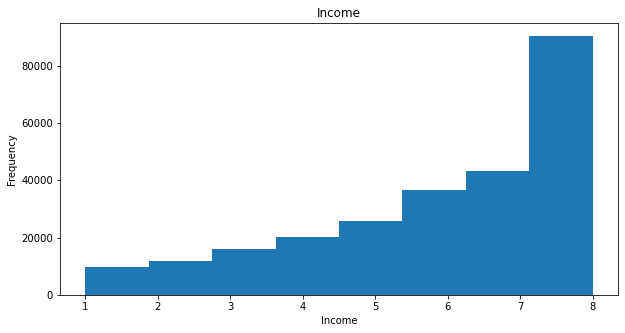

In [14]:
plot_histogram(data, 'Income', 'Income',bins=8)

<AxesSubplot:xlabel='Income'>

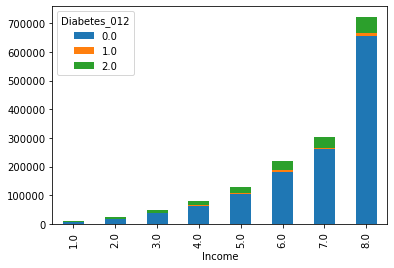

In [15]:
df_agg = data.groupby(['Income', 'Diabetes_012'])['Income'].sum().unstack()
df_agg.plot(kind='bar', stacked=True)

### BMI

In [16]:
data.BMI.unique()

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [17]:
data_per = data.BMI.value_counts()*100/len(data)
list = {}
for i in data_per.index:
    list[i] = (np.floor(data_per[i]))

print(f"Najwięcej jest osób z BMI o wartości: {max(list, key=list.get)}, dokładnie: {list[27]}%")

Najwięcej jest osób z BMI o wartości: 27.0, dokładnie: 9.0%


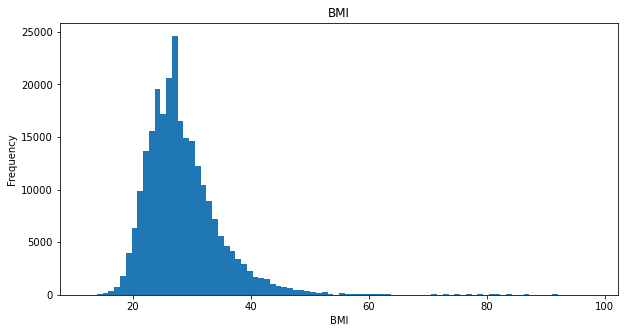

In [18]:
plot_histogram(data, 'BMI', 'BMI',bins=88)

<AxesSubplot:xlabel='BMI'>

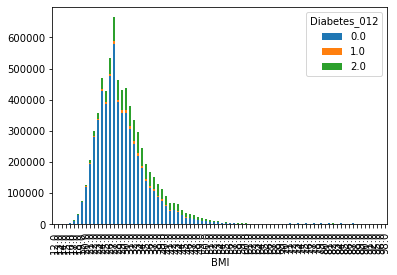

In [19]:
df_agg = data.groupby(['BMI', 'Diabetes_012'])['BMI'].sum().unstack()
df_agg.plot(kind='bar', stacked=True)

### Smoker

In [20]:
data.Smoker.unique()

array([1., 0.])

Jest to zmienna binarna. 1 dla osoby palącej, 0 dla osoby nie palącej.

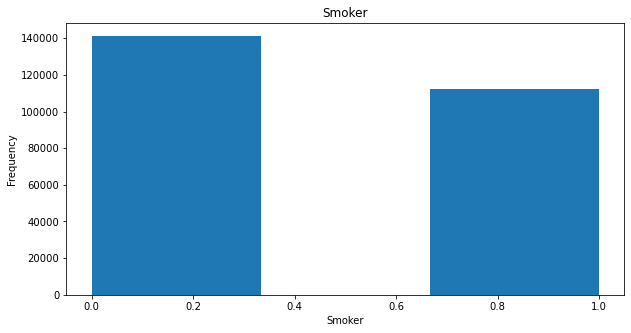

In [21]:
plot_histogram(data, 'Smoker', 'Smoker',bins=3)

In [22]:
data_perc = data.Smoker.value_counts()*100/len(data)
data_count  = data.Smoker.value_counts()

print(f"Ilośc pomiarów w każej klasie klasy 0: {data_count[0]}, 1: {data_count[1]}")
print(f"Udział procentowy klasy 0: {np.floor(data_perc[0])}%, 1: {np.floor(data_perc[1])}%")

Ilośc pomiarów w każej klasie klasy 0: 141257, 1: 112423
Udział procentowy klasy 0: 55.0%, 1: 44.0%


### Stroke

In [23]:
data.Stroke.unique()

array([0., 1.])

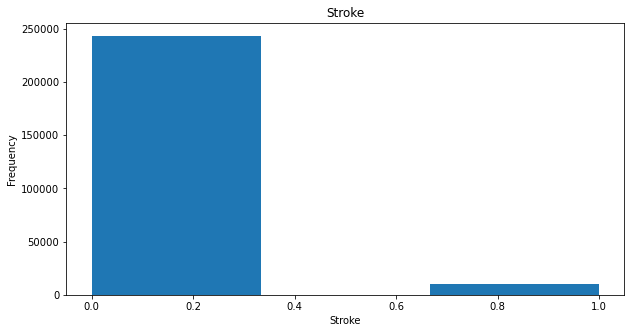

In [24]:
plot_histogram(data, 'Stroke', 'Stroke',bins=3)

In [25]:
data_perc = data.Stroke.value_counts()*100/len(data)
data_count  = data.Stroke.value_counts()

print(f"Ilośc pomiarów w każej klasie klasy 0: {data_count[0]}, 1: {data_count[1]}")
print(f"Udział procentowy klasy 0: {np.floor(data_perc[0])}%, 1: {np.floor(data_perc[1])}%")

Ilośc pomiarów w każej klasie klasy 0: 243388, 1: 10292
Udział procentowy klasy 0: 95.0%, 1: 4.0%


## Age

In [26]:
data.Age.unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

Zbiór danych dzieli osoby na 13 grup wiekowych.

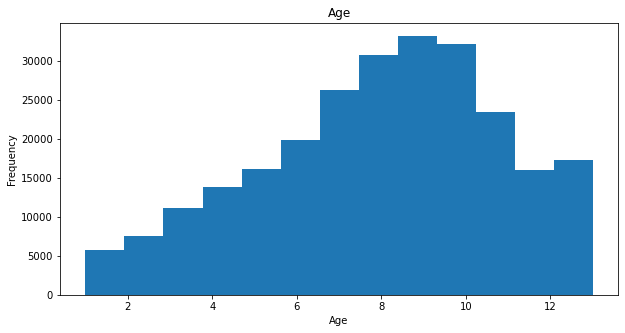

In [27]:
plot_histogram(data, 'Age', 'Age',bins=13)

In [28]:
data_perc = data.Age.value_counts()*100/len(data)
data_count  = data.Age.value_counts()

for i in data_perc.index:
    print(f"Grupa {i} stanowi: {np.floor(data_perc[i])}% wszystkich pomiarów")

Grupa 9.0 stanowi: 13.0% wszystkich pomiarów
Grupa 10.0 stanowi: 12.0% wszystkich pomiarów
Grupa 8.0 stanowi: 12.0% wszystkich pomiarów
Grupa 7.0 stanowi: 10.0% wszystkich pomiarów
Grupa 11.0 stanowi: 9.0% wszystkich pomiarów
Grupa 6.0 stanowi: 7.0% wszystkich pomiarów
Grupa 13.0 stanowi: 6.0% wszystkich pomiarów
Grupa 5.0 stanowi: 6.0% wszystkich pomiarów
Grupa 12.0 stanowi: 6.0% wszystkich pomiarów
Grupa 4.0 stanowi: 5.0% wszystkich pomiarów
Grupa 3.0 stanowi: 4.0% wszystkich pomiarów
Grupa 2.0 stanowi: 2.0% wszystkich pomiarów
Grupa 1.0 stanowi: 2.0% wszystkich pomiarów


<AxesSubplot:xlabel='Age'>

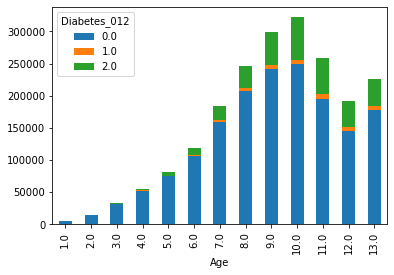

In [29]:
df_agg = data.groupby(['Age', 'Diabetes_012'])['Age'].sum().unstack()
df_agg.plot(kind='bar', stacked=True)

### Education

In [30]:
data.Education.unique()

array([4., 6., 3., 5., 2., 1.])

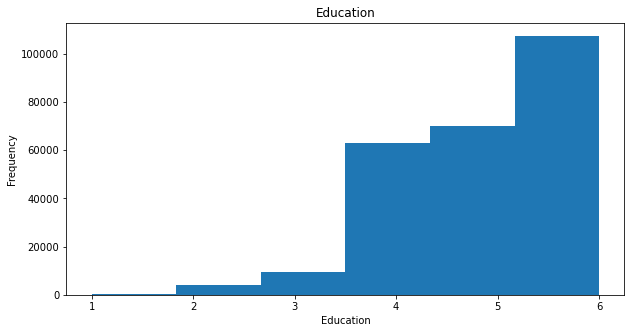

In [31]:
plot_histogram(data, 'Education', 'Education',bins=6)

In [32]:
data_perc = data.Education.value_counts()*100/len(data)
data_count  = data.Education.value_counts()

for i in data_perc.index:
    print(f"Grupa {i} stanowi: {np.floor(data_perc[i])}% wszystkich pomiarów")

Grupa 6.0 stanowi: 42.0% wszystkich pomiarów
Grupa 5.0 stanowi: 27.0% wszystkich pomiarów
Grupa 4.0 stanowi: 24.0% wszystkich pomiarów
Grupa 3.0 stanowi: 3.0% wszystkich pomiarów
Grupa 2.0 stanowi: 1.0% wszystkich pomiarów
Grupa 1.0 stanowi: 0.0% wszystkich pomiarów


<AxesSubplot:xlabel='Age'>

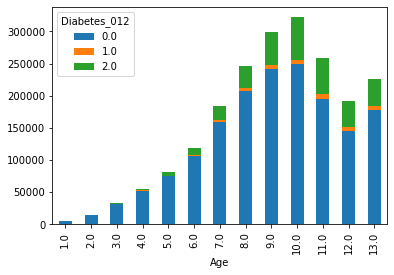

In [33]:
df_agg = data.groupby(['Age', 'Diabetes_012'])['Age'].sum().unstack()
df_agg.plot(kind='bar', stacked=True)

### Model #1 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.classifier import ROCAUC

In [35]:
algo = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0], test_size= 0.2)

param = {
    'n_estimators' : [10,50,100,150],
    'max_depth' : [2,4,8],
    'criterion' : ['gini', 'entropy']
}

In [36]:
def model_search(algo,param,x,y):
    
    search =  RandomizedSearchCV(estimator = algo, param_distributions= param,n_iter=20,n_jobs=-1, random_state= 42)
    search.fit(x,y)
    best = search.best_estimator_
    return best

In [37]:
model = model_search(algo,param,x_train,y_train)

Accuracy score: 0.8489829706717124
Recall score: 0.8489829706717124
Precision score: 0.8489829706717124


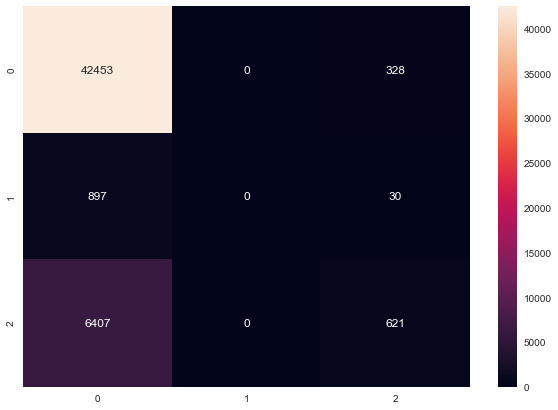

In [38]:
def valid(model, x_test, y_test):
    predictions = model.predict(x_test)
    print(f"Accuracy score: {accuracy_score(y_test,predictions)}")
    print(f"Recall score: {recall_score(y_test,predictions,average='micro')}")
    print(f"Precision score: {precision_score(y_test,predictions,average='micro')}")
    
    matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (10,7))
    sns.heatmap(matrix, annot = True, fmt = 'g')
valid(model, x_test, y_test)

c:\Users\ja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


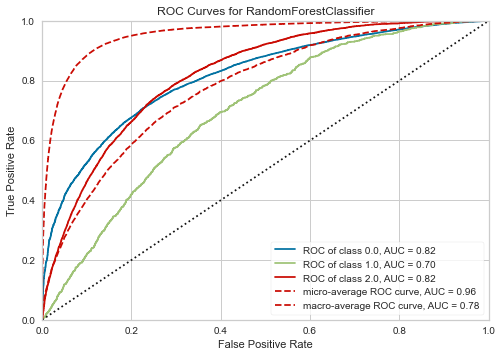

In [39]:
def ROC(model, x_test, y_test):
    """_summary_

    Args:
        model (scikit_model): trained model
        x_test (list): validation features
        y_test (lsit): validation labels
    """
    vis = ROCAUC(model)
    vis.fit(x_test,y_test)
    vis.score(x_test, y_test)
    vis.show()

ROC(model, x_test, y_test)

### Model #2

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
algo = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:],data.iloc[:,0], test_size= 0.2)

param = {
    'C' : [0.1,0.5,1,2],
    'tol' : [0.0001,0.001,0.01],
    'penalty' : ['l1', 'l2']
}

In [42]:
model = model_search(algo,param,x_train,y_train)

c:\Users\ja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ja\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\ja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Solv

Accuracy score: 0.844666508987701
Recall score: 0.844666508987701
Precision score: 0.844666508987701


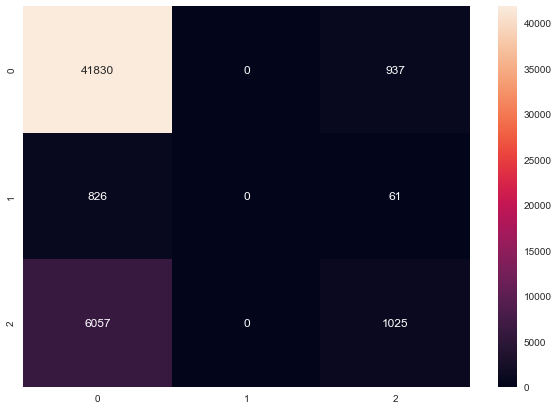

In [43]:
valid(model, x_test, y_test)

c:\Users\ja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


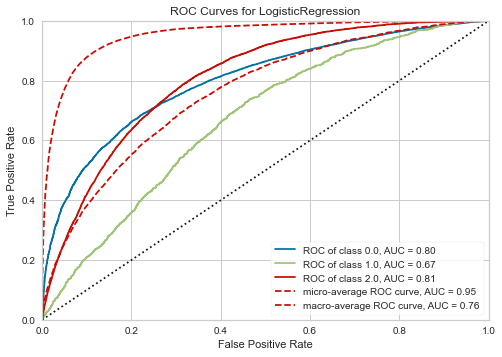

In [44]:
ROC(model, x_test, y_test)

### Model#3 Tensorflow 

In [45]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense
from keras.models import Sequential 
from keras.utils import np_utils

In [46]:
def create_model(n_layers):
    model = Sequential()
    model.add(keras.Input(x_train.shape[1]),)
    for i in range(n_layers):
        model.add(Dense(units=30, activation='relu'))
    Dense(3, activation = 'softmax')
    return model

In [47]:
dummy_y = np_utils.to_categorical(y_train, num_classes=3)
dummy_test_y = np_utils.to_categorical(y_test, num_classes=3)
dummy_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [48]:
scores = {}

model_1 = Sequential([
    Dense(30, activation = 'relu', input_shape = (x_train.shape[1],)),
    Dense(3, activation = 'softmax'),
])

model_1.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_1 = model_1.fit(x_train,dummy_y,batch_size=3,epochs = 3, validation_split=0.2)


Epoch 1/3
54119/54119 [==============================] - 45s 829us/step - loss: 0.4258 - accuracy: 0.8421 - val_loss: 0.4059 - val_accuracy: 0.8461
Epoch 2/3
54119/54119 [==============================] - 49s 914us/step - loss: 0.4066 - accuracy: 0.8467 - val_loss: 0.4054 - val_accuracy: 0.8469
Epoch 3/3
54119/54119 [==============================] - 43s 794us/step - loss: 0.4041 - accuracy: 0.8471 - val_loss: 0.4052 - val_accuracy: 0.8466


In [49]:
model_2 = Sequential([
    Dense(30, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(3, activation = 'softmax'),
])

model_2.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_2 = model_2.fit(x_train,dummy_y,batch_size=5,epochs = 3, validation_split=0.2)


Epoch 1/3
32471/32471 [==============================] - 28s 851us/step - loss: 0.4171 - accuracy: 0.8449 - val_loss: 0.4106 - val_accuracy: 0.8444
Epoch 2/3
32471/32471 [==============================] - 28s 851us/step - loss: 0.4042 - accuracy: 0.8468 - val_loss: 0.4047 - val_accuracy: 0.8463
Epoch 3/3
32471/32471 [==============================] - 28s 851us/step - loss: 0.4019 - accuracy: 0.8473 - val_loss: 0.3996 - val_accuracy: 0.8483


In [50]:
model_3 = Sequential([
    Dense(30, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(3, activation = 'softmax'),
])

model_3.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_3 = model_3.fit(x_train,dummy_y,batch_size=5,epochs = 3, validation_split=0.2)


Epoch 1/3
32471/32471 [==============================] - 30s 909us/step - loss: 0.4196 - accuracy: 0.8443 - val_loss: 0.4073 - val_accuracy: 0.8477
Epoch 2/3
32471/32471 [==============================] - 29s 888us/step - loss: 0.4041 - accuracy: 0.8471 - val_loss: 0.4019 - val_accuracy: 0.8479
Epoch 3/3
32471/32471 [==============================] - 29s 892us/step - loss: 0.4018 - accuracy: 0.8474 - val_loss: 0.4001 - val_accuracy: 0.8473


In [51]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                660       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                660       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 93        
Total params: 1,683
Trainable params: 1,683
Non-trainable params: 0
_________________________________________________________________


In [53]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                660       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 93        
Total params: 2,613
Trainable params: 2,613
Non-trainable params: 0
_________________________________________________________________


### Wyniki trenowania trzech modeli sieci neuronowych.

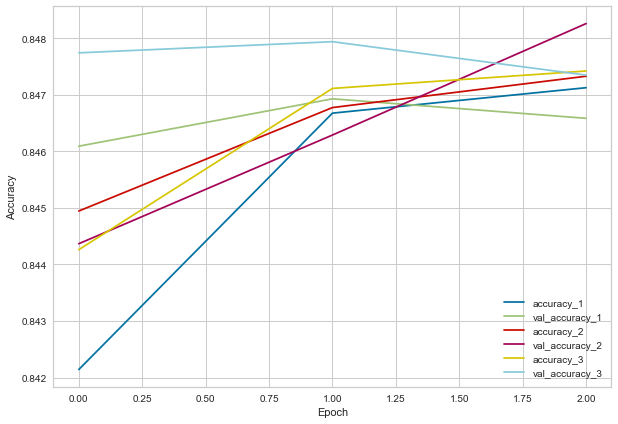

In [54]:
def plot_history(history_1,history_2,history_3):
    plt.figure(figsize = (10,7))
    plt.plot(history_1.history['accuracy'], label = 'accuracy_1')
    plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy_1')
    plt.plot(history_2.history['accuracy'], label = 'accuracy_2')
    plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy_2')
    plt.plot(history_3.history['accuracy'], label = 'accuracy_3')
    plt.plot(history_3.history['val_accuracy'], label = 'val_accuracy_3')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
plot_history(history_1,history_2,history_3)

#### ROC curve i Macierz dokładności pierwszego modelu (Tensorflow)

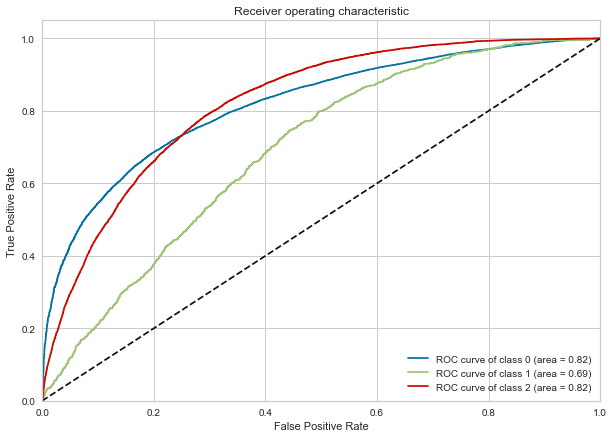

In [55]:
def multiclassroc(model, x_test, y_test):
    """_summary_

    Args:
        model (scikit_model): trained model
        x_test (list): validation features
        y_test (lsit): validation labels
    """
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    y_pred = model.predict(x_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize = (10,7))
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label = 'ROC curve of class {0} (area = {1:0.2f})'
                 .format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

multiclassroc(model_1, x_test, dummy_test_y)

Accuracy score: 0.8489435509303059
Recall score: 0.8489435509303059
Precision score: 0.8489435509303059


<AxesSubplot:title={'center':'Confusion matrix for model_1'}>

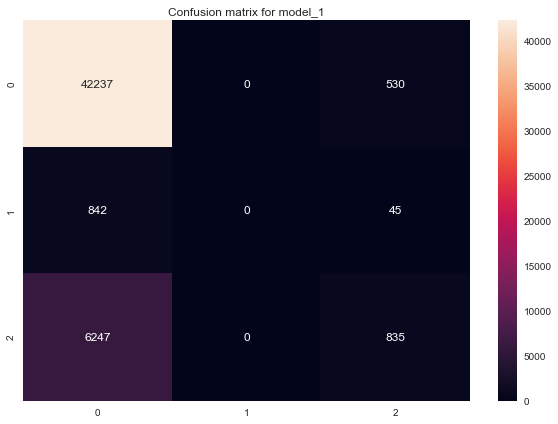

In [56]:
predictions = np.argmax(model_1.predict(x_test),axis=1)
print(f"Accuracy score: {accuracy_score(y_test,predictions)}")
print(f"Recall score: {recall_score(y_test,predictions,average='micro')}")
print(f"Precision score: {precision_score(y_test,predictions,average='micro')}")
    
matrix = confusion_matrix(y_test.ravel(), predictions.ravel())
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for model_1')
sns.heatmap(matrix, annot = True, fmt = 'g')

#### ROC curve i Macierz dokładności drugiego modelu (Tensorflow)

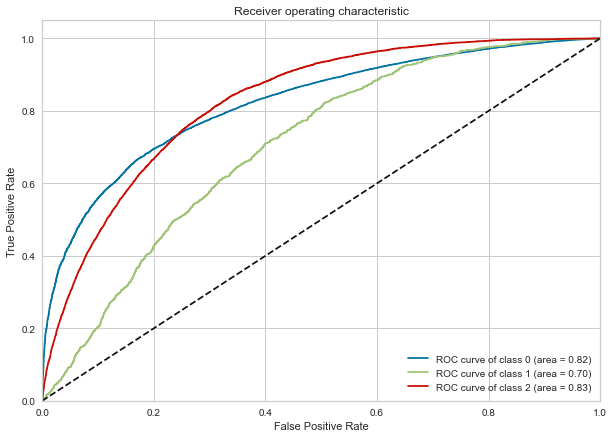

In [57]:
multiclassroc(model_2, x_test, dummy_test_y)

Accuracy score: 0.8492391989908546
Recall score: 0.8492391989908546
Precision score: 0.8492391989908546


<AxesSubplot:title={'center':'Confusion matrix for model_1'}>

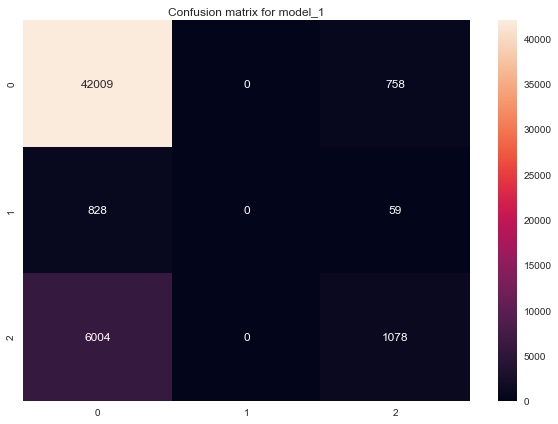

In [58]:
predictions = np.argmax(model_2.predict(x_test),axis=1)
print(f"Accuracy score: {accuracy_score(y_test,predictions)}")
print(f"Recall score: {recall_score(y_test,predictions,average='micro')}")
print(f"Precision score: {precision_score(y_test,predictions,average='micro')}")
    
matrix = confusion_matrix(y_test.ravel(), predictions.ravel())
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for model_1')
sns.heatmap(matrix, annot = True, fmt = 'g')

#### ROC curve i Macierz dokładności trzeciego modelu (Tensorflow)

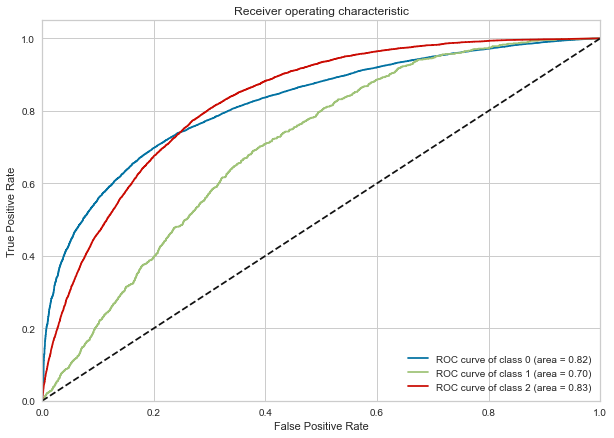

In [59]:
multiclassroc(model_3, x_test, dummy_test_y)

Accuracy score: 0.8492589088615579
Recall score: 0.8492589088615579
Precision score: 0.8492589088615579


<AxesSubplot:title={'center':'Confusion matrix for model_1'}>

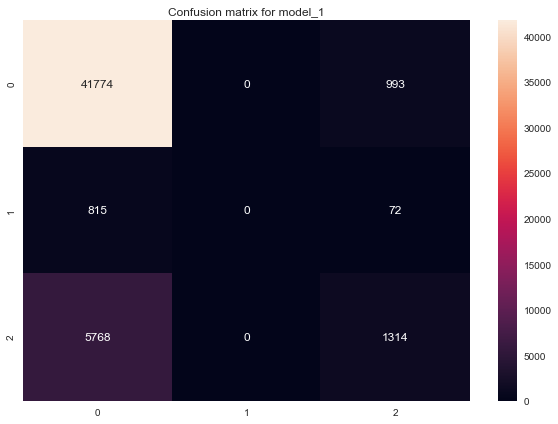

In [60]:
predictions = np.argmax(model_3.predict(x_test),axis=1)
print(f"Accuracy score: {accuracy_score(y_test,predictions)}")
print(f"Recall score: {recall_score(y_test,predictions,average='micro')}")
print(f"Precision score: {precision_score(y_test,predictions,average='micro')}")
    
matrix = confusion_matrix(y_test.ravel(), predictions.ravel())
plt.figure(figsize = (10,7))
plt.title('Confusion matrix for model_1')
sns.heatmap(matrix, annot = True, fmt = 'g')